<a href="https://colab.research.google.com/github/Sayan-15/Option-Trading-Prediction-Model/blob/main/OTP_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUT / CALL Analysis & Prediction Using Algo. Trading

### Import Libraries

In [ ]:
from datetime import date
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd

#Data Source
!pip install yfinance
import yfinance as yf

#Data viz
import plotly.graph_objs as go
import plotly as pt
!pip install pandas_ta
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader.data as webd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 4.9 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=cdca76d94ea1d076552519741084e7571477f04f6931ef915e03cf31a56e4195
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


### Fetch and Save Data


In [ ]:

yf.pdr_override()
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = '^NSEI',

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "60d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "5m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True
    )
data
def SaveData(df, filename):
  df.to_csv(filename + '.csv')
today = date.today()
dataname='^NSEI'+'_'+str(today)
SaveData(data, dataname)
data= pd.read_csv(dataname+'.csv')
data

[*********************100%***********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Volume
0,2022-07-12 09:15:00+05:30,16126.200195,16133.549805,16104.400391,16127.099609,0
1,2022-07-12 09:20:00+05:30,16127.599609,16146.250000,16114.349609,16146.250000,0
2,2022-07-12 09:25:00+05:30,16144.049805,16148.799805,16131.150391,16140.500000,0
3,2022-07-12 09:30:00+05:30,16140.599609,16149.849609,16132.700195,16144.450195,0
4,2022-07-12 09:35:00+05:30,16145.150391,16152.349609,16139.549805,16140.000000,0
...,...,...,...,...,...,...
4493,2022-10-07 15:05:00+05:30,17311.599609,17312.599609,17301.050781,17312.599609,0
4494,2022-10-07 15:10:00+05:30,17312.150391,17315.599609,17304.849609,17307.099609,0
4495,2022-10-07 15:15:00+05:30,17307.150391,17312.150391,17307.150391,17310.349609,0
4496,2022-10-07 15:20:00+05:30,17310.550781,17322.099609,17310.000000,17321.849609,0


# Bollinger Bands

In [ ]:
import numpy as np
import pandas as pd

#Data Source
!pip install yfinance
import yfinance as yf

#Data viz
import plotly.graph_objs as go
import plotly as pt
data = yf.download(tickers='^NSEI', period='1d', interval='1m')
#Interval required 1 minute
data['Middle Band'] = data['Close'].rolling(window=21).mean()
data['Upper Band'] = data['Middle Band'] + 1.96*data['Close'].rolling(window=21).std()
data['Lower Band'] = data['Middle Band'] - 1.96*data['Close'].rolling(window=21).std()

#declare figure
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y= data['Middle Band'],line=dict(color='blue', width=.7), name = 'Middle Band'))
fig.add_trace(go.Scatter(x=data.index, y= data['Upper Band'],line=dict(color='red', width=1.5), name = 'Upper Band (Put)'))
fig.add_trace(go.Scatter(x=data.index, y= data['Lower Band'],line=dict(color='green', width=1.5), name = 'Lower Band (Call)'))


#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='NSEI live price put_call prediction',
    yaxis_title='NIFTY50')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="minute", stepmode="backward"),
            dict(count=5, label="5m", step="minute", stepmode="backward"),
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)


#Show
fig.show()
pt.offline.plot(fig,filename='bbplot.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


'bbplot.html'

[*********************100%***********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Volume
0,2022-01-21 09:15:00+05:30,17613.699219,17623.449219,17552.300781,17570.199219,0
1,2022-01-21 09:20:00+05:30,17569.000000,17574.849609,17546.349609,17549.900391,0
2,2022-01-21 09:25:00+05:30,17550.400391,17562.349609,17526.400391,17554.349609,0
3,2022-01-21 09:30:00+05:30,17554.349609,17605.650391,17538.300781,17603.449219,0
4,2022-01-21 09:35:00+05:30,17601.400391,17623.949219,17577.199219,17593.099609,0
...,...,...,...,...,...,...
4490,2022-04-21 14:50:00+05:30,17396.849609,17404.599609,17395.750000,17402.050781,0
4491,2022-04-21 14:55:00+05:30,17401.849609,17407.699219,17398.500000,17403.500000,0
4492,2022-04-21 15:00:00+05:30,17404.699219,17413.650391,17396.000000,17404.650391,0
4493,2022-04-21 15:05:00+05:30,17405.500000,17406.449219,17381.250000,17385.150391,0


### Bollinger Bands Put Call Signal

In [ ]:
#Data Source
!pip install yfinance
import yfinance as yf

#Data viz
import plotly.graph_objs as go
import plotly as pt
!pip install pandas_ta
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import pandas as pd
import pandas_datareader.data as webd

plt.style.use('fivethirtyeight')
yf.pdr_override()
data = yf.download(tickers='^NSEI', period='1d', interval='1m')
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['Close'], length=20,std=2)
    data = pd.concat([data, bb], axis=1).reindex(data.index)

    for i in range(len(data)):
        if data['Close'][i] < data['BBL_20_2.0'][i]:
            if position == False :
                bbBuy.append(data['Adj Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Close'][i] > data['BBU_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Close'][i])
                position = False #To indicate that I actually went there
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


In [ ]:
#storing the function
data = bb_strategy(data)
data

,Open,High,Low,Close,Adj Close,Volume,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,bb_Buy_Signal_price,bb_Sell_Signal_price
Datetime,,,,,,,,,,,,,
2022-08-05 09:15:00+05:30,17423.650391,17436.150391,17409.150391,17413.849609,17413.849609,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-05 09:16:00+05:30,17416.849609,17427.550781,17416.800781,17427.050781,17427.050781,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-05 09:17:00+05:30,17426.449219,17429.750000,17411.500000,17411.500000,17411.500000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-05 09:18:00+05:30,17413.349609,17415.599609,17393.849609,17394.000000,17394.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-05 09:19:00+05:30,17394.199219,17398.849609,17389.500000,17392.699219,17392.699219,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05 15:26:00+05:30,17398.050781,17398.150391,17395.099609,17397.599609,17397.599609,0,17385.505664,17395.554883,17405.604102,0.115538,0.601736,NaN,NaN
2022-08-05 15:27:00+05:30,17397.699219,17398.900391,17394.800781,17397.349609,17397.349609,0,17385.677695,17395.319824,17404.961953,0.110859,0.605256,NaN,NaN
2022-08-05 15:28:00+05:30,17396.599609,17397.449219,17389.449219,17389.949219,17389.949219,0,17386.068821,17395.424805,17404.780788,0.107568,0.207375,NaN,NaN


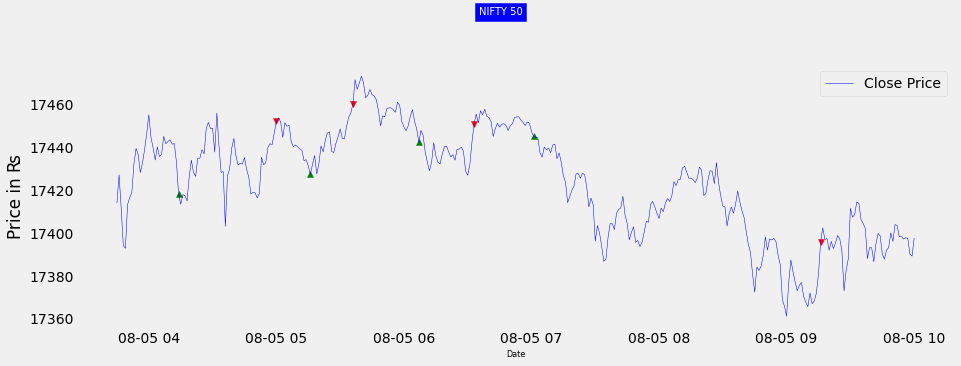

In [ ]:
#plot
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle('NIFTY 50', fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Adj Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)
plt.show()
#pt.offline.plot(fig,filename='bbindicator.html')

### MACD PUT/CALL Signal


MACD with pandas-ta; it'll give us three columns, one is of the difference between the two EMA's called MACD and one is the EMA of MACD value called as Signal, and the last one is the difference between MACD & Signal called as MACD histogram.

In [ ]:

data = yf.download(tickers='^NSEI', period='1d', interval='1m')
macd = ta.macd(data['Close'])
macd


[*********************100%***********************]  1 of 1 completed


,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Datetime,,,
2022-08-05 09:15:00+05:30,NaN,NaN,NaN
2022-08-05 09:16:00+05:30,NaN,NaN,NaN
2022-08-05 09:17:00+05:30,NaN,NaN,NaN
2022-08-05 09:18:00+05:30,NaN,NaN,NaN
2022-08-05 09:19:00+05:30,NaN,NaN,NaN
...,...,...,...
2022-08-05 15:26:00+05:30,1.125290,0.001285,1.124004
2022-08-05 15:27:00+05:30,1.026168,-0.078269,1.104437
2022-08-05 15:28:00+05:30,0.346470,-0.606374,0.952843


In [ ]:
## Now that we've got the MACD columns, we'll merge them with our main dataframe.
data = pd.concat([data, macd], axis=1).reindex(data.index)
data


,Open,High,Low,Close,Adj Close,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Datetime,,,,,,,,,
2022-08-05 09:15:00+05:30,17423.650391,17436.150391,17409.150391,17413.849609,17413.849609,0,NaN,NaN,NaN
2022-08-05 09:16:00+05:30,17416.849609,17427.550781,17416.800781,17427.050781,17427.050781,0,NaN,NaN,NaN
2022-08-05 09:17:00+05:30,17426.449219,17429.750000,17411.500000,17411.500000,17411.500000,0,NaN,NaN,NaN
2022-08-05 09:18:00+05:30,17413.349609,17415.599609,17393.849609,17394.000000,17394.000000,0,NaN,NaN,NaN
2022-08-05 09:19:00+05:30,17394.199219,17398.849609,17389.500000,17392.699219,17392.699219,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-08-05 15:26:00+05:30,17398.050781,17398.150391,17395.099609,17397.599609,17397.599609,0,1.125290,0.001285,1.124004
2022-08-05 15:27:00+05:30,17397.699219,17398.900391,17394.800781,17397.349609,17397.349609,0,1.026168,-0.078269,1.104437
2022-08-05 15:28:00+05:30,17396.599609,17397.449219,17389.449219,17389.949219,17389.949219,0,0.346470,-0.606374,0.952843


In [ ]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Close'][i] < df['Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell


In [ ]:
 ## Included a Risk factor in our strategy. If the current price goes beyond the acceptable limits
 ## or if the current price goes beyond the specified percentage, we'll sell. 
 ##In simple terms, we've added a STOP LOSS and a Trailing Stop loss to our strategy.
MACD_strategy = MACD_Strategy(data, 0.025)
MACD_strategy


In [ ]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data


,Open,High,Low,Close,Adj Close,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
Datetime,,,,,,,,,,,,
2022-08-05 09:15:00+05:30,17423.650391,17436.150391,17409.150391,17413.849609,17413.849609,0,NaN,NaN,NaN,NaN,NaN,False
2022-08-05 09:16:00+05:30,17416.849609,17427.550781,17416.800781,17427.050781,17427.050781,0,NaN,NaN,NaN,NaN,NaN,False
2022-08-05 09:17:00+05:30,17426.449219,17429.750000,17411.500000,17411.500000,17411.500000,0,NaN,NaN,NaN,NaN,NaN,False
2022-08-05 09:18:00+05:30,17413.349609,17415.599609,17393.849609,17394.000000,17394.000000,0,NaN,NaN,NaN,NaN,NaN,False
2022-08-05 09:19:00+05:30,17394.199219,17398.849609,17389.500000,17392.699219,17392.699219,0,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05 15:26:00+05:30,17398.050781,17398.150391,17395.099609,17397.599609,17397.599609,0,1.125290,0.001285,1.124004,NaN,NaN,False
2022-08-05 15:27:00+05:30,17397.699219,17398.900391,17394.800781,17397.349609,17397.349609,0,1.026168,-0.078269,1.104437,NaN,17397.349609,False
2022-08-05 15:28:00+05:30,17396.599609,17397.449219,17389.449219,17389.949219,17389.949219,0,0.346470,-0.606374,0.952843,NaN,NaN,False


Text(0.5, 0, 'Date')

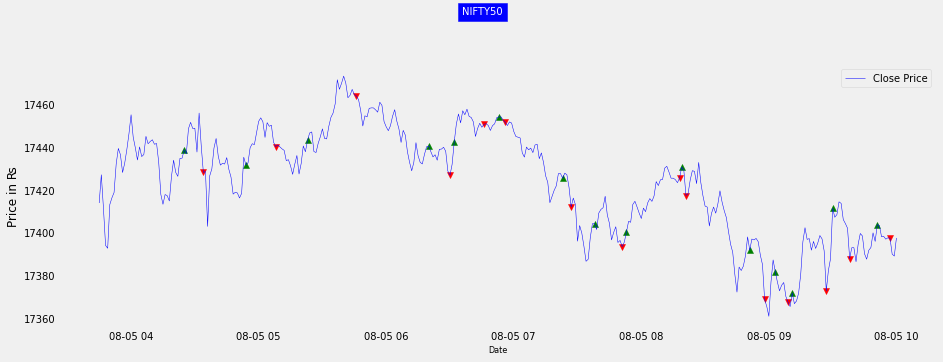

In [ ]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle('NIFTY50', fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)




In [ ]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go

# Pulling Data


# Gauge chart

gauge = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 
              'y': [0, 1]},
    value = int(data['Close'].tail(1)),
    mode = "gauge+number+delta",
    title = {'text':"<b>NSEI DAY RANGE</b><br><span style='color: gray; font-size:0.8em'>Indian Rs</span>", 
             'font': {"size": 20}},
    delta = {'reference': int(data['Close'].tail(2)[0])},
    gauge = {
             'axis': {'range': [16750,17750]},
             'steps' : [
                 {'range': [16750, 17250], 'color': "lightgray"},
                 {'range': [17250, 17750], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 
                            'thickness': 0.75, 
                            'value': 17500}}))

gauge.show()